<h1 style="font-size:35pt">ASOC and UniChurch playground</h1>

# Table of Contents
1. [Introduction](#Introduction)
    1. [Packages](#Packages)
    2. [Read Sheets](#Read_Sheets)
    3. [Display Sheets](#Display_Sheets)
3. [Locations](#Locations)
4. [Route maps](#Routes)


## Introduction
<div id='Intro'/>


### Packages 

In [104]:
import folium
import pandas as pd
import gpxpy
import os

import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, LineString
import numpy as np
import geopandas as gpd


### Read Sheets
The sheets are identified using the google identifciation number.(gid)
- `Contents`:  gid=1252950902
- `ASOC Walks and Locations`: gid=0
- `Church and Caregroup Locations`: gid=1720331646

These gid values were found using the url of the respective sheet. 

In [193]:
### Display Sheets

In [199]:
gids = [1252950902, 0, 1720331646]


sheet_url = "https://docs.google.com/spreadsheets/d/1mGR_xugxcg3Pc3e1KLzggZn6XfnSJOuHncZ64hOo8M4/export?format=csv"


df = [pd.read_csv(f'{sheet_url}&gid={gid}') for gid in gids]
display(df[0].head())
display(df[1].head())
display(df[2].head())

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,NaN,ASOC Walks
3,NaN,Church anbd


,Name,Latitude,Longitude,Google_Link,Address,Description,Route_Links,Icon,Colour
0,Awabakal Nature Reserve,-32.991495,151.722283,"https://www.google.com/maps/place/13+Ivy+St,+D...","13 Ivy St, Dudley NSW 2290","It will be in the bush, so pls have proper wal...",NaN,flag,blue
1,Bar Beach,-32.940471,151.769567,https://www.google.com/maps/place/Yuelarbah+Tr...,"Yuelarbah Track, Bar Beach NSW 2300",NaN,NaN,umbrella-beach,beigh
2,Blackbutt/Richely Reserve,-32.931901,151.704362,https://www.google.com/maps/place/32°55'55.6%2...,"26-4 Mahogany Dr, New Lambton NSW 2305",NaN,NaN,tree,green
3,Blacksmiths Playground,-33.080611,151.656147,https://www.google.com/maps/place/Blacksmiths+...,"128 Ungala Rd, Blacksmiths NSW 2281",NaN,NaN,flag,blue
4,Blue Gums Hills,-32.883995,151.621271,https://www.google.com/maps/place/Village+Gree...,"4J8C+8G, Minmi NSW 2287",The walk is on gravel in the bushes with sligh...,NaN,mountain,darkgreen


,Name,Latitude,Longitude,Address,Google_Link,Route_Link,Desciption,Icon,Colour
0,ES Building,NaN,NaN,"Ring Rd, Callaghan NSW 2308",NaN,NaN,NaN,house,orange
1,Basden Theate,-32.893586,-32.893586,"Ring Rd, Callaghan NSW 2308","https://www.google.com/maps/place/Parking+lot,...",NaN,NaN,house,orange
2,Nuspace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create subfolders with name of locations

In [259]:
def create_folders(df, column_name, base_directory):
    """3"""
    if os.path.exists(base_directory):
        print("This folder already exists!")
    else:
        os.makedirs(base_directory)

    for name in df[column_name]:
        os.makedirs(f'{base_directory}/{name}')



In [261]:
#base_directory = "GPX_Routes/Sabbath_Walks/"
base_directory = "Maps/Sabbath_Walks/"
column_name = "Name"
create_folders(df, column_name, base_directory)

In [252]:
for name in df[column_name]:
    print(name)

Awabakal Nature Reserve
Bar Beach
Blackbutt/Richely Reserve
Blacksmiths Playground
Blue Gums Hills
Carrington Boat Ramp
Caves Beach
Croundace Bay Park
Elebana Park
Fern Bay
Fernleigh Cafe
Green Point
Hickson Street Lookout
Islington Park
Koorangang Wetlands
Macquarie Hills
Mount Sugarloaf
Munibung Hills
Nobby Breakwall
Pirrita island carpark and foreshore
Speers Point Boat Ramp
Stockton Foreshore
Stoney Creek
Swansea Beach
TJ's House
Tramway Trail
Walka Water Works
Yuelarbah Trail


## Locations

In [238]:
# Google Sheets URL

sheet_url = "https://docs.google.com/spreadsheets/d/1mGR_xugxcg3Pc3e1KLzggZn6XfnSJOuHncZ64hOo8M4/export?format=csv&gid=0"

# Read the data into a DataFrame
df = pd.read_csv(sheet_url)
df

# Extract data from the DataFrame
names = df['Name'].tolist()
locations = df[['Latitude', 'Longitude']].values.tolist()
links = df['Google_Link'].tolist()
routes = df['Route_Link'].tolist()
addresses = df['Address'].tolist()
descriptions = df['Description'].tolist()
lengths = df['Length']
icons = df['Icon'].tolist()
colours = df['Colour'].tolist()

# Create a map centered around the first location 
m = folium.Map(location=(-32.95, 151.7), zoom_start=11) 

# Add markers for each location
for name, loc, link, route, address, desc, len, icon, colour in zip(names, locations, links, routes, addresses, descriptions, lengths, icons, colours):
    # Set a default icon if the icon field is blank
    if pd.isna(icon) or icon == "":
        icon = 'info-sign'  # Default icon

    # Replaces NaN with empty strings
    desc = "" if pd.isna(desc) else desc
    route = "" if pd.isna(route) else route

    custom_icon = folium.Icon(color = colour, icon=icon, prefix='fa')


    folium.Marker(
        location=loc,
        popup=f"<b>{name}</b><br><a href='{route}' target='_blank'>Route Map Link</a><br>{desc}",
        tooltip=name,
        icon = custom_icon
    ).add_to(m)

m

/var/folders/pt/kkxzl8252bj57r_h2w9w4rf00000gn/T/ipykernel_63959/1580895692.py:33: UserWarning: color argument of Icon should be one of: {'darkblue', 'blue', 'purple', 'darkgreen', 'red', 'white', 'darkpurple', 'lightred', 'gray', 'orange', 'beige', 'lightgray', 'lightblue', 'darkred', 'pink', 'black', 'lightgreen', 'cadetblue', 'green'}.
  custom_icon = folium.Icon(color = colour, icon=icon, prefix='fa')


In [71]:
Locations[0]


[-32.924156832584664, 151.791283616395]

In [202]:
import folium
import pandas as pd

# Google Sheets URL


sheet_url = 'https://docs.google.com/spreadsheets/d/4mGR_xugxcg3Pc3e1KLzggZn6XfnSJOuHncZ64hOo8M4/export?format=csv'

# Read the data into a DataFrame
df = pd.read_csv(sheet_url)
df

# Extract data from the DataFrame
names = df['Name'].tolist()
locations = df[['Latitude', 'Longitude']].values.tolist()
links = df['Link'].tolist()
addresses = df['Address'].tolist()
descriptions = df['Description'].tolist()
routes = df['Routes'].tolist()

# Create a map centered around the first location
m = folium.Map(location=(-32.9, 151.79), zoom_start=10)

# Add markers for each location
for name, loc, link, address, desc, route in zip(names, locations, links, addresses, descriptions, routes):
    folium.Marker(
        location=loc,
        popup=f"<b>{name}</b><br><a href='{link}' target='_blank'>Google Maps Link</a><br>{address}<br>{desc}<br><a href='{route}' target='_blank'>Route Map Link</a>",
        tooltip=name
    ).add_to(m)

# Save the map as an HTML file
html_file = 'Maps/ASOC_walk_locations_map.html'
m.save(html_file)

print(f"Map has been saved to {html_file}")

HTTPError: HTTP Error 404: Not Found

In [173]:
df

,Name
0,Latatude
1,Longitude
2,Links
3,Addresses
4,Descriptions


In [52]:


# Create a map centered around the first location
m = folium.Map(location=Locations[0], zoom_start=15)

# Add markers for each location
for name, loc, link, address, desc in zip(Names, Locations, Links, Addresses, Descriptions):
    folium.Marker(
        location=loc,
        popup=f"<b>{name}</b><br><a href='{link}' target='_blank'>Google Maps Link</a><br>{address}<br>{desc}",
        tooltip=name
    ).add_to(m)

# Save the map as an HTML file
#m.save('locations_map.html')

# Display the map
m

## Route maps
<div id='Routes'/>


In [67]:
m = folium.Map(location=map_center, zoom_start=14)

# Read the GPX file
with open('Strava_Routes/ASOC 1.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

# Extract route coordinates
for track in gpx.tracks:
    for segment in track.segments:
        coords = [(point.latitude, point.longitude) for point in segment.points]
        folium.PolyLine(coords, color="blue", weight=2.5, opacity=1).add_to(m)

# Add markers for the start and end points of the route
if coords:
    folium.Marker(coords[0], popup="Start", icon=folium.Icon(color='green')).add_to(m)
    folium.Marker(coords[-1], popup="End", icon=folium.Icon(color='red')).add_to(m)

# Save the map as an HTML file
m.save('strava_route_map.html')
m

In [113]:
def create_map(gpx, name, zoom):
    m = folium.Map(location=[float(locations[0][0]), float(locations[0][1])], zoom_start=zoom)

    folium.TileLayer('openstreetmap').add_to(m)

    # Read the GPX file
    with open(gpx, 'r') as gpx_file:
        gpx = gpxpy.parse(gpx_file)

    # Extract route coordinates
    for track in gpx.tracks:
        for segment in track.segments:
            coords = [(point.latitude, point.longitude) for point in segment.points]
            folium.PolyLine(coords, color="blue", weight=2.5, opacity=1).add_to(m)

    # Add markers for the start and end points of the route
    if coords:
        folium.Marker(coords[0], popup="Start", icon=folium.Icon(color='green')).add_to(m)
        folium.Marker(coords[-1], popup="End", icon=folium.Icon(color='red')).add_to(m)

    # Save the map as an HTML file
    m.save(name)


In [111]:
gpx = "GPX_Routes/Mount Sugarloaf summit walk.gpx"
create_map(gpx, "Funny.html")

## Church Location maps

In [115]:
gpx = "GPX_Routes/ASOC Library_Basden Theatre (BA) Church.gpx"
create_map(gpx, "Church_Locations/Libary.html", 15)

In [121]:
import folium
import gpxpy

# Path to the GPX file
gpx_file = 'GPX_Routes/ASOC Library_Basden Theatre (BA) Church.gpx'

# Parse the GPX file
with open(gpx_file, 'r') as f:
    gpx = gpxpy.parse(f)

# Extract coordinates from the GPX file
route = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route.append((point.latitude, point.longitude))

# Create a map centered around the first point of the GPX route
if route:
    start_point = route[0]
else:
    start_point = [0, 0]

m = folium.Map(location=start_point, zoom_start=20)

# Add the GPX route to the map
folium.PolyLine(route, color='blue', weight=2.5, opacity=1).add_to(m)

# Save the map as an HTML file
#html_file = 'Library_Church.html'
#m.save(html_file)

#print(f"Map has been saved to {html_file}")
m


In [162]:
"""
gpx - The file name.
name - Name of file.
start_marker  -                 {"name": "Libray", "link":"www.something.com", "flag":"fire"}
map_settings -
"""

def create_map_with_markers(gpx, name, map_setings, start_marker,):
    name = start_marker["name"]
    link = start_marker["link"]
    icon = start_marker["icon"]
    colour = start_marker["colour"]
    desciption = start_marker["desciption"]

    centre, zoom = map_setings

    # Extract coordinates from the GPX file
    route = []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                route.append((point.latitude, point.longitude))

    # Create a map centered around the first point of the GPX route
    if route:
        start_point = route[centre]
    else:
        start_point = [0, 0]

    # Initalise map layer
    m = folium.Map(location=start_point, zoom_start=zoom)

    # Add the GPX route to the map
    folium.PolyLine(route, color='blue', weight=2.5, opacity=1).add_to(m)

    # Make marker Icon
    custom_icon = folium.Icon(color = colour, icon=icon, prefix='fa')

    # Add start marker to the map
    folium.Marker(
        location=route[0],
        popup=f"<b>{name}</b><br><a href='{link}' target='_blank'>Google Maps Link</a><br>{desciption}",
        tooltip=name,
        icon = custom_icon
    ).add_to(m)


    # Save the map as an HTML file
    #html_file = 'Library_Church.html'
    #m.save(html_file)

    #print(f"Map has been saved to {html_file}")
    return m


In [165]:
# Path to the GPX file
gpx_file = 'GPX_Routes/ASOC Library_Basden Theatre (BA) Church.gpx'

start = {"name": "Libray", "link":"www.something.com", "centre":5, "icon":"square-parking", 
         "colour":"blue", "desciption":"Follow path to the Basden Theatre"}

map = [5,25]
m = create_map_with_markers(gpx, "Church_Locations/Libary2.html", map, start)
m

## Image Conversion

Converts pdf images to png. This is important for marking icons.

In [ ]:
def 

In [171]:
from pdf2image import convert_from_path

# Path to the PDF file
pdf_path = 'Pictures/ASOC-Logo-orange.pdf'

# Convert PDF to PNG
images = convert_from_path(pdf_path)
# Save the first page as PNG (assuming the PDF has only one page)
image_path = 'Pictures/ASOC-Logo-orange.png'
images[0].save(image_path, 'PNG')

ASOC_Logo aspect ratio: 2188:1014

In [179]:
ratio = 2188/1025
70/ratio

32.79250457038391

In [ ]:
# Initalise map layer
    m = folium.Map(location=start_point, zoom_start=zoom)

# Add start marker to the map
    folium.Marker(
        location=route[0],
        popup=f"<b>{name}</b><br><a href='{link}' target='_blank'>Google Maps Link</a><br>{desciption}",
        tooltip=name,
        icon = custom_icon
    ).add_to(m)

# OSMinx

In [4]:
pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 802.8 kB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
import networkx as nx

In [55]:
# Places to get the street network
places = ["Birmingham Gardens, Newcastle, Australia",
          "Shortland, Newcastle, Australia",
          "Jesmond, Newcastle, Australia"]

# Get street networks
graphs = [ox.graph_from_place(place, network_type='walk') for place in places]

# Print structure of the graphs to debug
for i, graph in enumerate(graphs):
    print(f"Graph {i}:")
    print(graph)

# Convert graphs to GeoDataFrames
nodes_gdfs = []
edges_gdfs = []

for graph in graphs:
    nodes, edges = ox.graph_to_gdfs(graph)
    nodes_gdfs.append(nodes)
    edges_gdfs.append(edges)


Graph 0:
MultiDiGraph with 106 nodes and 282 edges
Graph 1:
MultiDiGraph with 247 nodes and 656 edges
Graph 2:
MultiDiGraph with 409 nodes and 1020 edges


In [56]:
# Merge the GeoDataFrames
merged_nodes_gdf = gpd.GeoDataFrame(pd.concat(nodes_gdfs, ignore_index=True))
merged_edges_gdf = gpd.GeoDataFrame(pd.concat(edges_gdfs, ignore_index=True))

In [36]:
# Create a folium map
map_center = [-32.88, 151.69]  # Center of Newcastle
m = folium.Map(location=map_center, zoom_start=14)

# Function to add GeoDataFrame to folium map
def add_gdf_to_map(gdf, color, folium_map):
    for _, row in gdf.iterrows():
        folium.GeoJson(row['geometry'], style_function=lambda x, color=color: {'color': color}).add_to(folium_map)

# Add nodes and edges to the map
colors = ['blue', 'green', 'red']
for nodes_gdf, edges_gdf, color in zip(nodes_gdfs, edges_gdfs, colors):
    #add_gdf_to_map(nodes_gdf, color, m)
    add_gdf_to_map(edges_gdf, color, m)

# Save the map to an HTML file
m.save("newcastle_grids.html")


<Axes: >

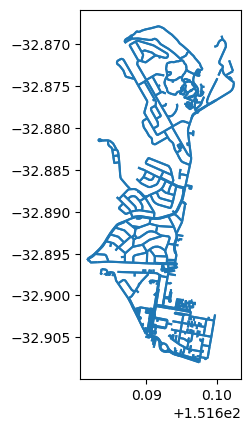

In [57]:
merged_edges_gdf.plot()

In [51]:
Newcastle = ox.graph_from_place("Newcastle, Australia", network_type='walk')

In [106]:
gdf =edges#.set_geometry(col='geometry', inplace=True)
#gdf.to_file('dataframe.shp') 
#gdf.to_file("filename.geojson", driver='GeoJSON')
#gdf.to_file('Letterboxing_Maps/file.shp', driver='ESRI Shapefile')
gdf
#import geopandas as gpd
g = gpd.read_file("filename.geojson")
g

,u,v,key,osmid,lanes,name,highway,maxspeed,oneway,reversed,length,ref,service,bridge,width,junction,geometry
0,260947869,8475102504,0,164050695,2,Blue Gum Road,secondary,50,False,0,18.031,None,None,None,None,None,"LINESTRING (151.69199 -32.89747, 151.69196 -32..."
1,276582652,8440262666,0,36926160,2,Mordue Parade,residential,50,False,0,5.292,None,None,None,None,None,"LINESTRING (151.69063 -32.90418, 151.69057 -32..."
2,276582652,3774448573,0,415393753,2,Blue Gum Road,secondary,50,False,1,17.641,None,None,None,None,None,"LINESTRING (151.69063 -32.90418, 151.69060 -32..."
3,276582652,276590340,0,925517557,1,Blue Gum Road,secondary,40,False,0,62.195,None,None,None,None,None,"LINESTRING (151.69063 -32.90418, 151.69067 -32..."
4,276582663,7593205106,0,261175471,None,Hirst Street,service,None,False,1,8.202,None,None,None,None,None,"LINESTRING (151.69086 -32.90315, 151.69078 -32..."
5,276582663,7593205107,0,336935637,4,Blue Gum Road,secondary,40,False,0,6.262,None,None,None,None,None,"LINESTRING (151.69086 -32.90315, 151.69085 -32..."
6,276582663,7593205108,0,336935637,4,Blue Gum Road,secondary,40,False,1,6.828,None,None,None,None,None,"LINESTRING (151.69086 -32.90315, 151.69088 -32..."
7,276583007,11951679734,0,415393752,2,None,trunk,None,False,0,18.084,None,None,None,None,None,"LINESTRING (151.69054 -32.90477, 151.69051 -32..."
8,276583007,7593204893,0,685799562,2,Newcastle Road,trunk,60,False,0,9.752,A15,None,None,None,None,"LINESTRING (151.69054 -32.90477, 151.69064 -32..."
9,276583007,2668036569,0,714680366,3,Newcastle Road,trunk,60,False,1,9.001,A15,None,None,None,None,"LINESTRING (151.69054 -32.90477, 151.69044 -32..."


<Axes: >

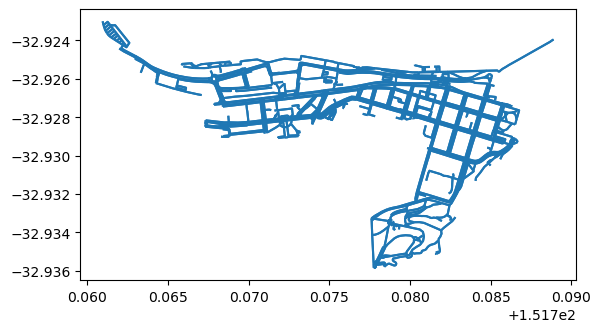

In [53]:
edges.plot()